In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [84]:
# Reading the training file
RawData1= pd.read_csv('DengAI_Predicting_Disease_Spread_-_Training_Data_Features.csv')

In [85]:
#Importing Total number of cases from the Total cases file
dn_cases_RF= pd.read_csv('DengAI_Predicting_Disease_Spread_-_Training_Data_Labels.csv')
dn_cases_RF.head(10)

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6
5,sj,1990,23,2
6,sj,1990,24,4
7,sj,1990,25,5
8,sj,1990,26,10
9,sj,1990,27,6


In [86]:
# Importing the Total Number of cases 
RawData1['Total_Cases'] = dn_cases_RF['total_cases']
RawData1 = RawData1.fillna(value=RawData1.mean())
RawData1.head(5)
RawData1.head(10)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,Total_Cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6
5,sj,1990,23,1990-06-04,0.142294,0.174850,0.254314,0.181743,9.58,299.630000,...,79.891429,9.58,17.212857,2.100000,28.114286,6.942857,34.4,23.9,39.1,2
6,sj,1990,24,1990-06-11,0.112900,0.092800,0.205071,0.210271,3.48,299.207143,...,82.000000,3.48,17.234286,2.042857,27.414286,6.771429,32.2,23.3,29.7,4
7,sj,1990,25,1990-06-18,0.072500,0.072500,0.151471,0.133029,151.12,299.591429,...,83.375714,151.12,17.977143,1.571429,28.371429,7.685714,33.9,22.8,21.1,5
8,sj,1990,26,1990-06-25,0.102450,0.146175,0.125571,0.123600,19.32,299.578571,...,82.768571,19.32,17.790000,1.885714,28.328571,7.385714,33.9,22.8,21.1,10
9,sj,1990,27,1990-07-02,0.142294,0.121550,0.160683,0.202567,14.41,300.154286,...,81.281429,14.41,18.071429,2.014286,28.328571,6.514286,33.9,24.4,1.1,6


In [87]:
#WE are removing the Yean and City Column as they do mot hae any correlation with the rest of the data
x = RawData1[[  'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 
       'station_avg_temp_c',  'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm',]]

In [88]:
# We are assigning the Y values to the Total Cases as we need to train the Data for running the model on TEST dataset
y = RawData1['Total_Cases'].values

In [89]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size = 0.2, random_state = 200)

In [90]:
#importing Random forest library from SKlearn to tarin and test my dataset
from sklearn.ensemble import RandomForestRegressor 

In [91]:
regressor = RandomForestRegressor(n_estimators=50)

In [92]:
regressor.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=50,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [93]:
regressor.score(x_train, y_train)

0.8734168438915532

In [94]:
regressor.score(x_test, y_test)

0.15127064034391435

In [95]:
pr = regressor.predict(x_test)

In [96]:
pr

array([ 14.14      ,  37.8       ,  30.08      ,  18.        ,
         2.96      ,  71.92      ,   6.76      ,  65.24      ,
        29.12      ,  25.15264502,  53.06      ,  49.94      ,
        37.08      ,  39.89333333,  44.14      ,  47.28      ,
        48.04      ,  53.04      ,  29.72      ,  40.02      ,
        32.14      ,  22.12      ,  14.86      ,  14.52      ,
        46.38      ,  33.        ,   6.54      ,  39.1       ,
        28.16      ,  62.72      ,  11.7       ,  35.56      ,
         3.18      ,  19.68      ,   8.7       ,  10.1       ,
        72.76      ,  14.4       ,  16.28      ,  18.34      ,
        13.24      ,  36.98      ,   8.78      ,   7.78      ,
        16.98      ,  25.15264502,  21.76      , 110.82      ,
        33.38      ,  34.96      ,  13.3       ,  20.26      ,
        62.54      ,  22.12      ,  11.88      ,  20.94      ,
        25.62      ,  27.06      ,  28.38      ,   4.        ,
        14.92      ,  24.14      ,   1.74      ,  19.02

In [76]:
(y_test)

array([ 17,   0,  30,  53,   7, 126,  18,  23,   3,  81,  38,  14,  40,
         7,   7,  16,  48,  28,  18,   0,  19,   1,  58,   8,  19,  13,
         0,   8,  11,  21,   6,   5,   0,  12,  13,   1, 106,  83,  46,
         5,   4,   5,   6,   0,  21,   9,   7, 137,  20,  30,   5,   2,
        75,   5,   1,  62,  19,  51,   9,   5,  26,   5,   3,  12,  16,
        73,   2,   0,  14,  48,   6,  21,   7,  40,   5,  15,   0,   5,
        18,   5,  34,  17,   6,   0,   2,   3, 333,   5,   1,  14,  21,
         2,   5,  13,  59,  14,  14,   3,  71,   2,  52,  56,  17,  30,
         2,  68,   1,   4,  38,  66,   9,  13,  18,   0,   8,   7,   0,
         4,  54,  27,  46,   3,   3,  28,   7,  10,  18,  12,  11,   0,
        17,  11,  18,   7,   8,   0,  47,  15,  84,  43,   0,   3,   4,
        11,   7,   9,   9,  47,   5,  50, 353,   0,  14,   3,  11,  28,
         7,  18,  18,  45,   2,  10,  10,  21,  13,   2,  61,  23,   0,
        15,   6,  54,  14, 220,   7,  65,  21,  85,   2,  17,   

In [77]:
from sklearn import metrics
metrics.mean_absolute_error(y_test, pr)

20.71039617080028

In [78]:
metrics.mean_squared_error(y_test, pr)

1820.3294652738339

In [79]:
np.sqrt(metrics.mean_squared_error(y_test, pr))

42.66531923323478

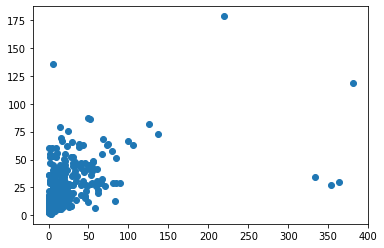

In [80]:
plt.scatter(y_test,pr)

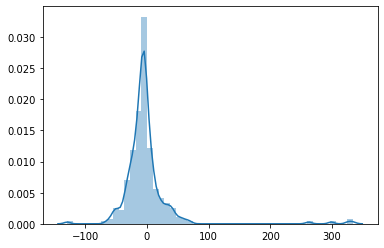

In [81]:
sns.distplot(y_test-pr)

In [82]:
from sklearn.metrics import r2_score
R2 = r2_score(y_test, pr)
R2

0.1704183439199468